In [10]:
import numpy as np
from numpy import log10
import pandas as pd
from pywt import wavedec, waverec
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from sklearn.metrics import mean_squared_error

In [11]:
# Load the EEG signal dataset from a CSV file
eeg_data = pd.read_csv('eeg_data.csv')

In [12]:
signal = eeg_data['EEG.AF3'].values

Text(0.5, 1.0, 'Original Signal')

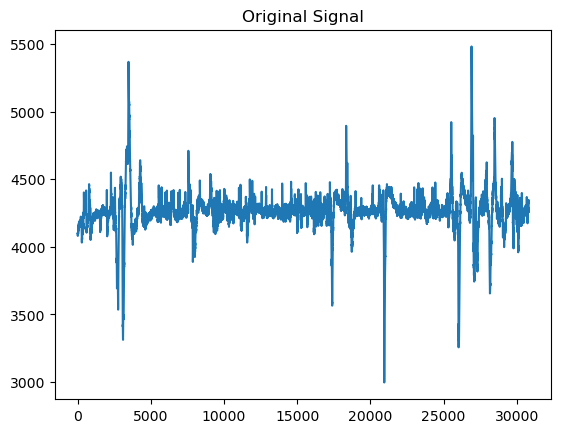

In [13]:
# Plot the noisy signal
plt.figure()
plt.plot(signal)
plt.title('Original Signal')

In [14]:
# Add Poisson noise to the signal
lambda_ = 5  # parameter of the Poisson distribution
noisy_signal = np.random.poisson(lambda_ * np.abs(signal)) * np.sign(signal)

Text(0.5, 1.0, 'Noisy signal')

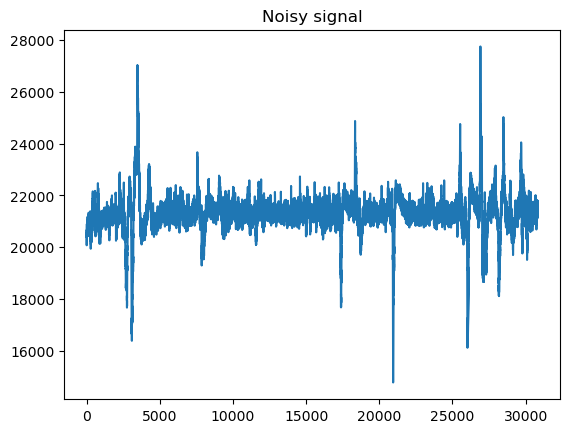

In [15]:
# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

In [16]:
# Define the Discrete Meyer wavelet
wavelet = 'dmey'

# Decompose the noisy signal into its wavelet coefficients
coeffs = wavedec(noisy_signal, wavelet)

# Set the threshold level for the wavelet coefficients
threshold = np.sqrt(2*np.log(len(signal))) * np.median(np.abs(coeffs[-2]))

# Apply the threshold to the wavelet coefficients
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])

# Reconstruct the denoised signal from the wavelet coefficients
filtered_signal = waverec(coeffs, wavelet)
filtered_signal = filtered_signal[:len(signal)]

In [20]:
mse = mean_squared_error(noisy_signal, filtered_signal)
psnr = 20 * log10(max(noisy_signal)) - 10 * log10(mse)
snr = 10 * log10(np.sum(noisy_signal**2) / np.sum((noisy_signal - filtered_signal)**2))

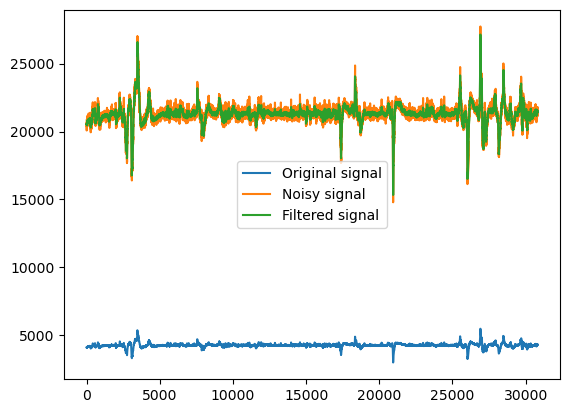

PSNR: 43.466397284332416
MSE: 34637.127853492595
SNR: 41.185149897342185


In [21]:
# Plot the original, noisy, and filtered signals
plt.plot(signal, label='Original signal')
plt.plot(noisy_signal, label='Noisy signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

# Print the PSNR, MSE, and SNR values
print("PSNR:", psnr)
print("MSE:", mse)
print("SNR:", snr)

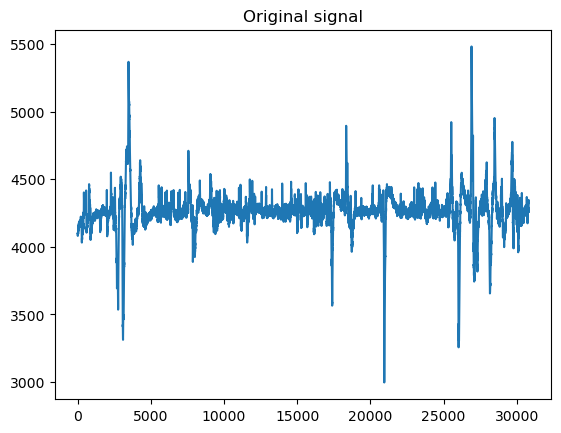

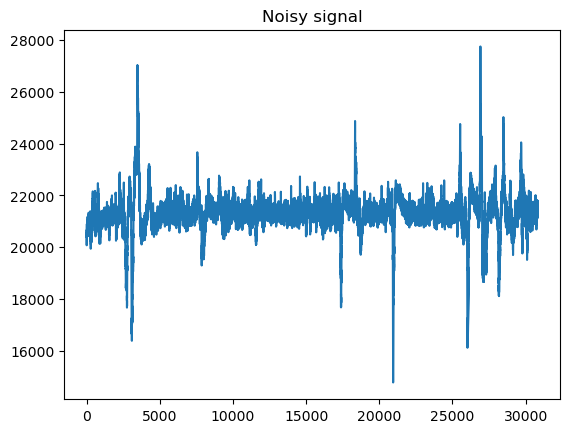

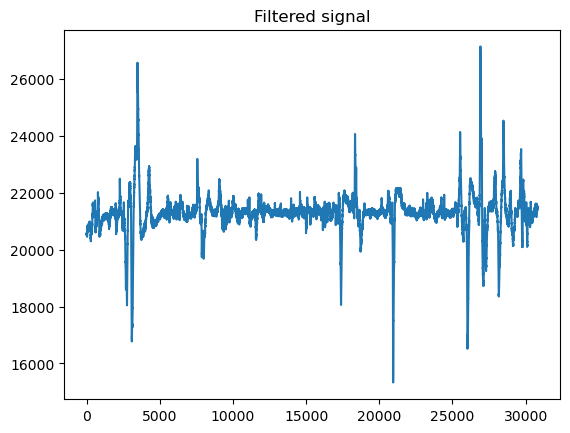

In [22]:
# Plot the original signal
plt.figure()
plt.plot(signal)
plt.title('Original signal')

# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

# Plot the filtered signal
plt.figure()
plt.plot(filtered_signal)
plt.title('Filtered signal')

# Show all the plots
plt.show()